<a href="https://colab.research.google.com/github/MuhammadRifatA/OCR_Kel4/blob/main/OCRKel4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt install tesseract-ocr-ind
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (16.6 MB/s)
debconf: unable to init

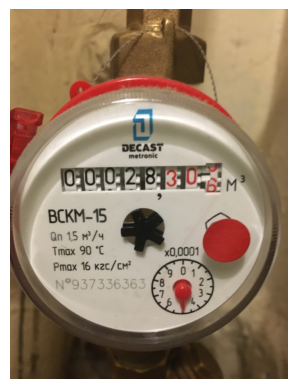

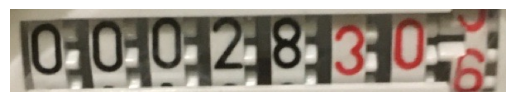

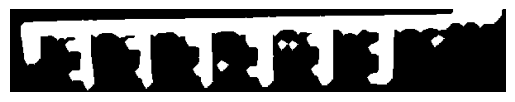

Teks Hasil Bacaan Angka: a ¢
a



In [31]:
import cv2 as cv
import pytesseract  as tsr
import matplotlib.pyplot as plt
import numpy as np
import imutils

# Path gambar input
image_path = "/content/id_1240_value_28_306.jpg"

# Membaca gambar dari path yang diberikan
image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menampilkan gambar input
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Menentukan ROI (Region Of Interest) dalam bentuk kotak pembatas (x, y, w, h)
roi = (170, 560, 600, 100) #kiri, atas, kanan, bawah

# Potong ROI dari gambar asli
x, y, w, h = roi
roi_image = image[y:y+h, x:x+w]

# Menampilkan ROI
plt.imshow(cv.cvtColor(roi_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Melakukan pra-pemrosesan untuk pengenalan teks pada ROI
gray = cv.cvtColor(roi_image, cv.COLOR_RGB2GRAY)
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
dist = cv.distanceTransform(thresh, cv.DIST_L2, 5)
dist = cv.normalize(dist, dist, 0, 1.0, cv.NORM_MINMAX)
dist = (dist*255).astype('uint8')
dist = cv.threshold(dist, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

kernel = cv.getStructuringElement(cv.MORPH_CROSS, (6, 6))
opening = cv.morphologyEx(dist, cv.MORPH_OPEN, kernel)

kernel = cv.getStructuringElement(cv.MORPH_CROSS, (4, 4))
dilation = cv.dilate(opening, kernel, iterations=2)

cnts = cv.findContours(dilation.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

nums = []
for c in cnts:
    (x, y, w, h) = cv.boundingRect(c)
    if w >= 15 and h > 50:
        nums.append(c)
nums = np.vstack([nums[i] for i in range(0, len(nums))])
hull = cv.convexHull(nums)

mask = np.zeros(dilation.shape[:2], dtype='uint8')
cv.drawContours(mask, [hull], -1, 255, -1)
mask = cv.dilate(mask, None, iterations=2)

final = cv.bitwise_and(dilation, dilation, mask=mask)

# Menampilkan hasil prapemrosesan
plt.imshow(final, cmap='gray')
plt.axis('off')
plt.show()

# Mendeteksi teks menggunakan Tesseract OCR pada ROI
config = "--psm 6"
text = tsr.image_to_string(final, config=config)
print("Teks Hasil Bacaan Angka:", text)